In [9]:
import os
import re
import sqlite3
import numpy as np
import tifffile
from skimage import filters, measure, morphology
import segmentation
import matplotlib.pyplot as plt


In [19]:
def normalize_image(img):
    """Normalize an image to the range 0-255."""
    img = img.astype(np.float32)  # Convert to float for processing
    img = (img - img.min()) / (img.max() - img.min()) * 255  # Stretch contrast
    return img.astype(np.uint8)  # Convert back to uint8

def load_tif(fname):
    try:
        img = tifffile.imread(fname)
        if not isinstance(img, np.ndarray):
            raise ValueError(f"File {fname} could not be loaded as an image.")
        
        print(f"Loaded {fname} with shape: {img.shape}, dtype: {img.dtype}")  

        # Convert RGB to grayscale
        if img.ndim == 3 and img.shape[2] == 3:
            print("Converting RGB image to grayscale.")
            img = np.mean(img, axis=2).astype(np.uint8)

        elif img.ndim > 2:  
            img = img[0, ...]  # Take the first slice if it's a stack

        # Normalize intensity
        img = normalize_image(img)
        print(f"Final shape after processing: {img.shape}, unique values: {np.unique(img)}")
        
        return img

    except Exception as e:
        print(f"Error loading {fname}: {e}")
        return None  

image = load_tif("/Users/hydrablaster/Desktop/Otegui_lab/confocal_images/20X-mchH2Bxistl345-2-seedling1-transzone_overview (Snapshot).tif")
image

Loaded /Users/hydrablaster/Desktop/Otegui_lab/confocal_images/20X-mchH2Bxistl345-2-seedling1-transzone_overview (Snapshot).tif with shape: (544, 1103, 3), dtype: uint8
Converting RGB image to grayscale.
Final shape after processing: (544, 1103), unique values: [  0   1   3   4   6   7   9  10  12  13  15  16  18  19  21  22  24  25
  27  28  30  31  33  34  36  37  39  40  42  43  45  46  48  49  51  52
  54  55  57  58  60  61  63  64  66  67  69  70  72  73  75  76  78  79
  81  82  84  85  87  88  90  91  93  94  96  97  99 100 102 103 105 106
 108 109 111 112 114 115 117 118 120 121 123 124 126 127 129 130 132 133
 135 136 138 139 141 142 144 145 147 148 150 151 153 154 156 157 159 160
 162 163 165 166 168 169 171 172 174 175 177 178 180 181 183 184 186 187
 189 190 192 193 195 196 198 199 201 202 204 205 207 208 210 211 213 214
 216 217 219 220 222 223 225 226 228 229 231 232 234 235 237 238 240 241
 243 244 246 247 249 250 252 253 255]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

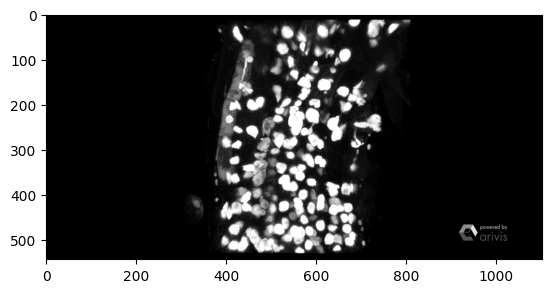

In [20]:
plt.imshow(image, cmap='gray')